# ***Student Performance Indicator***


#### **Life cycle of Machine learning Project**

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### **1) Problem statement**
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### **2) Data Collection**
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

## **1. Import data and required packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

- **Import the CSV data as Pandas Dataframe**

In [3]:
df = pd.read_csv('data/stud.csv')

- **Show top 5 records**

In [4]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


- **Shape of the dataset**

In [5]:
df.shape

(1000, 8)

## **2. Dataset information**

- **gender** : sex of students  -> (Male/female)
- **race/ethnicity** : ethnicity of students -> (Group A, B,C, D,E)
- **parental level of education** : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- **lunch** : having lunch before test (standard or free/reduced) 
- **test preparation course** : complete or not complete before test
- **math score**
- **reading score**
- **writing score**

## **3. Data Checks to perform**

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### **3.1 Checking Missing values**

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

> *There are no missing values in the dataset.*

### **3.2 Checking duplicates**

In [7]:
df.duplicated().sum()

np.int64(0)

> *There are no duplicate values in the dataset*

### **3.3 Check data types**

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


### **3.4 Check the number of unique values in each column**

In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### **3.5 Check statistics of dataset**

In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


> *Insight*
- From above description of numerical data, all means are very close to each other - between 66 and 69.
- All standard deviatons are also close - between 14.6 and 15.19.
- While there is minimum score 0 for math, for writing is much higher = 10 and for reading is much higher = 17.

### **3.6 Check various categories present in the different categorical columns**

In [11]:
print("Categories in 'gender' column:      ", end="")
print(df['gender'].unique().tolist())

print("Categories in 'race_ethinicity' column:      ", end=" ")
print(df['race_ethnicity'].unique().tolist())

print("Categories in 'parental_level_of_education' column:      ", end=" ")
print(df['parental_level_of_education'].unique().tolist())

print("Categories in 'lunch' column:      ", end=" ")
print(df['lunch'].unique().tolist())

print("Categories in 'test_preparation_course' column:      ", end=" ")
print(df['test_preparation_course'].unique().tolist())

Categories in 'gender' column:      ['female', 'male']
Categories in 'race_ethinicity' column:       ['group B', 'group C', 'group A', 'group D', 'group E']
Categories in 'parental_level_of_education' column:       ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'high school', 'some high school']
Categories in 'lunch' column:       ['standard', 'free/reduced']
Categories in 'test_preparation_course' column:       ['none', 'completed']


In [14]:
# define numerical and categorical columns
numeric_features = [col for col in df.columns if df[col].dtype != 'str']
categorical_features = [col for col in df.columns if df[col].dtype == 'str']

print("We have {} numerical features: {}".format(len(numeric_features), df[numeric_features].columns.tolist()))
print("We have {} categorical features: {}".format(len(categorical_features), df[categorical_features].columns.tolist()))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


### **3.7 Adding columns for "Total Score" and "Average"**

In [17]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [18]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [23]:
math_full = df[df['math_score'] == 100].shape[0]
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]

print(f"Number of students with full marks in Math: {math_full}")
print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [24]:
math_less_than_20 = df[df['math_score'] <= 20].shape[0]
reading_less_than_20 = df[df['reading_score'] <= 20].shape[0]
writing_less_than_20 = df[df['writing_score'] <= 20].shape[0]

print(f"Number of students with less than 20 marks in Math: {math_less_than_20}")
print(f"Number of students with less than 20 marks in Reading: {reading_less_than_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_than_20}")

Number of students with less than 20 marks in Math: 4
Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3


> *Insight*

- From above values, we get that the students have performed worst in Maths.
- Best performance is in Reading section.

## **4. Exploring Data (Visualization)**

### **4.1 Visualize avg. score distribution to make some conclusion**

<Axes: xlabel='average', ylabel='Count'>

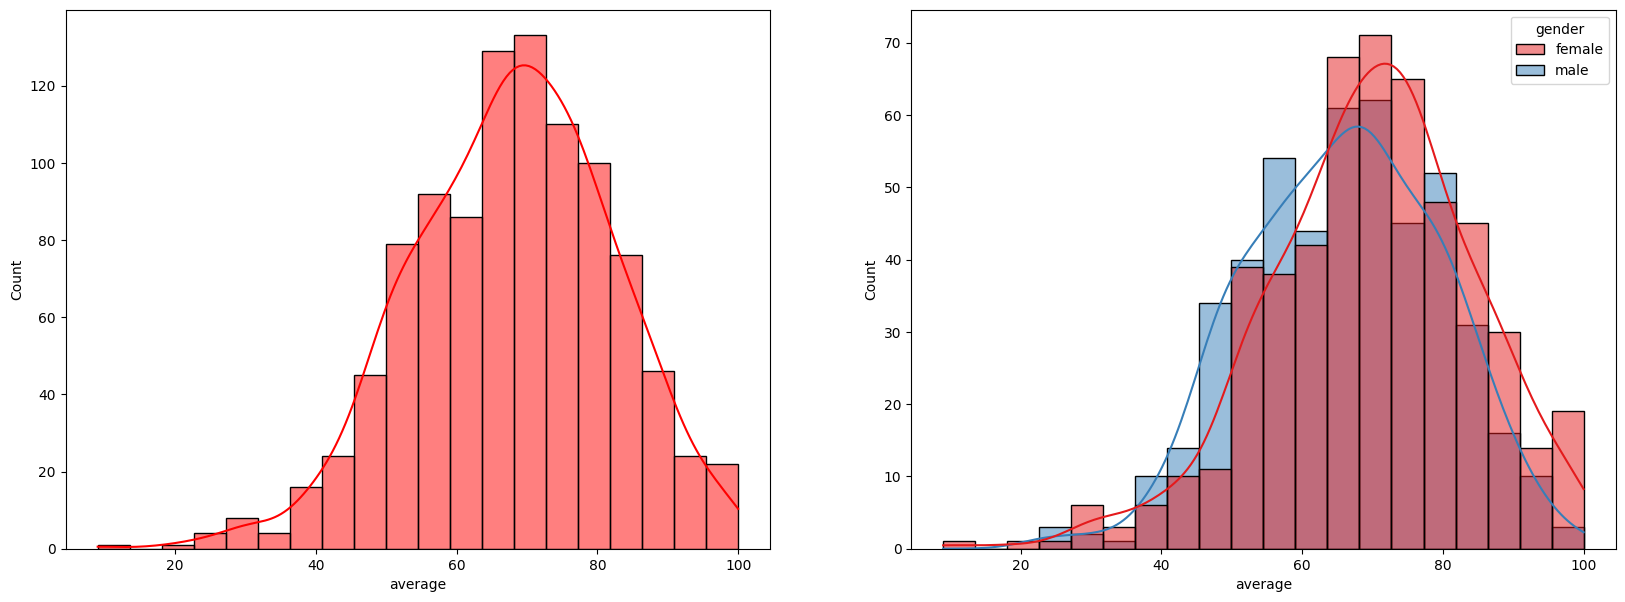

In [36]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='average', bins=20, kde=True, color='r')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='average', bins=20, kde=True, hue='gender', palette='Set1')

> *Female students tend to perform well than male students.*

### **4.2 Visualize total score distribution to make some conclusion**

<Axes: xlabel='total_score', ylabel='Count'>

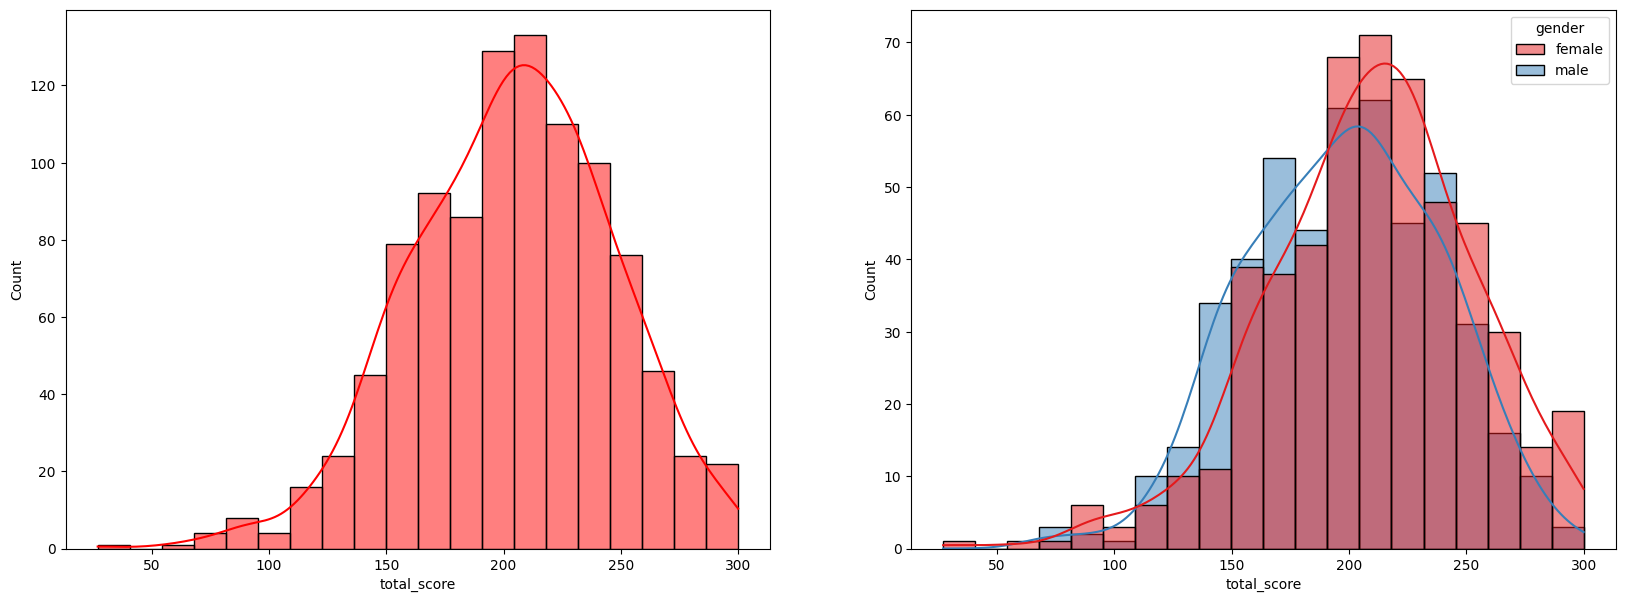

In [37]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='total_score', bins=20, kde=True, color='r')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='total_score', bins=20, kde=True, hue='gender', palette='Set1')

> *Female students tend to perform well than male students*

### **4.3 Visualizing average score based on lunch**

<Axes: xlabel='average', ylabel='Count'>

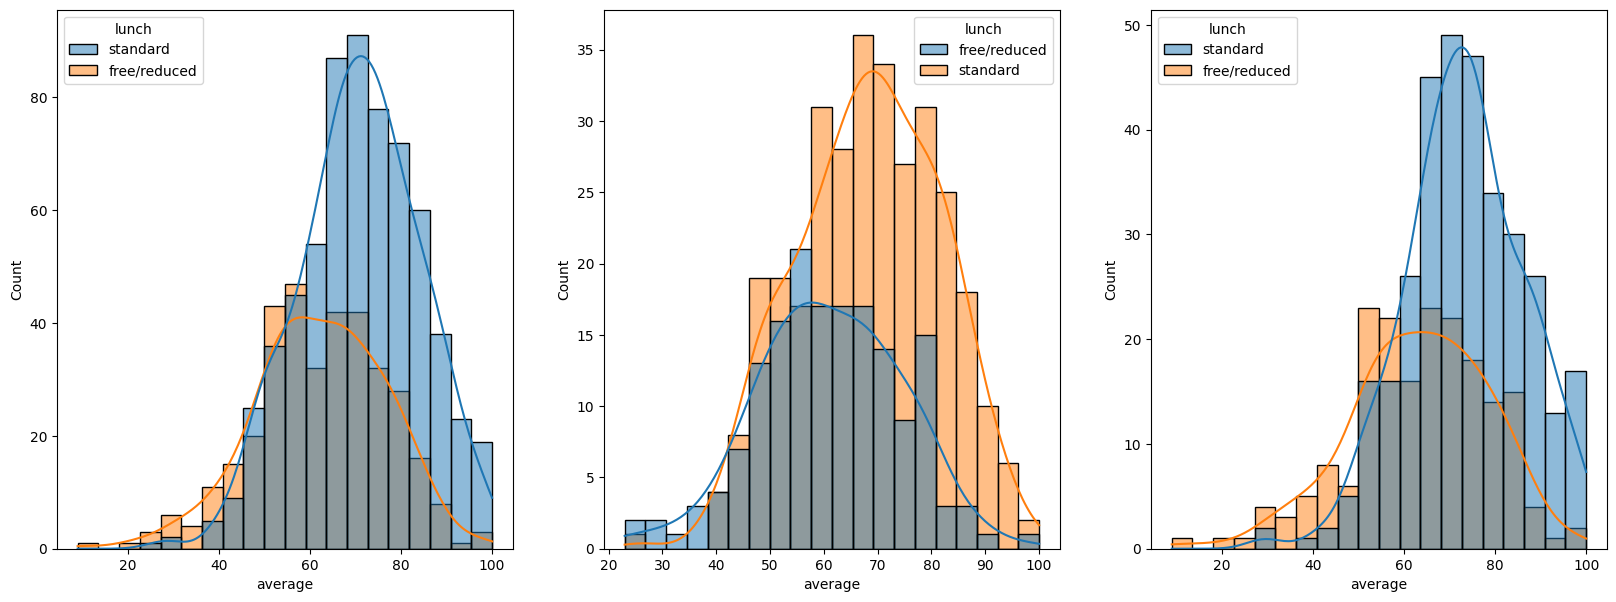

In [41]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', bins=20, kde=True, color='r', hue='lunch')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='average', bins=20, kde=True, color='r', hue='lunch')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='average', bins=20, kde=True, color='r', hue='lunch')

> - *Standard lunch helps perform well in exams.*
> - *Standar lunch helps perform well in exams be it a male or female*

### **4.3 Visualizing average score based on race/ethnicity**

<Axes: xlabel='average', ylabel='Count'>

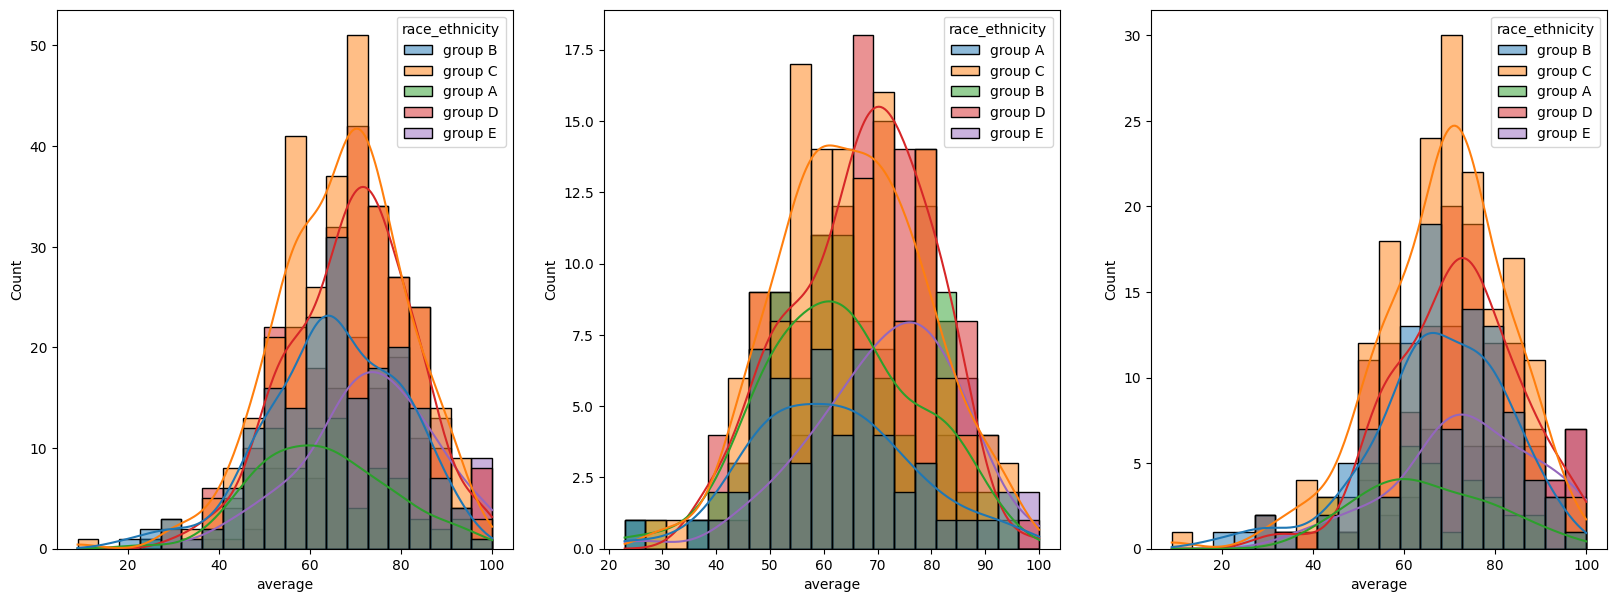

In [43]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', bins=20, kde=True, color='r', hue='race_ethnicity')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='average', bins=20, kde=True, color='r', hue='race_ethnicity')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='average', bins=20, kde=True, color='r', hue='race_ethnicity')

> - *Students of group A and group B tend to perform poorly in exams.*
> - *Students of group A and group B tend to perform poorly in exams irrespective of whether they are male or female.*

### **4.3 Visualizing average score based on parental elvel of education**

<Axes: xlabel='average', ylabel='Count'>

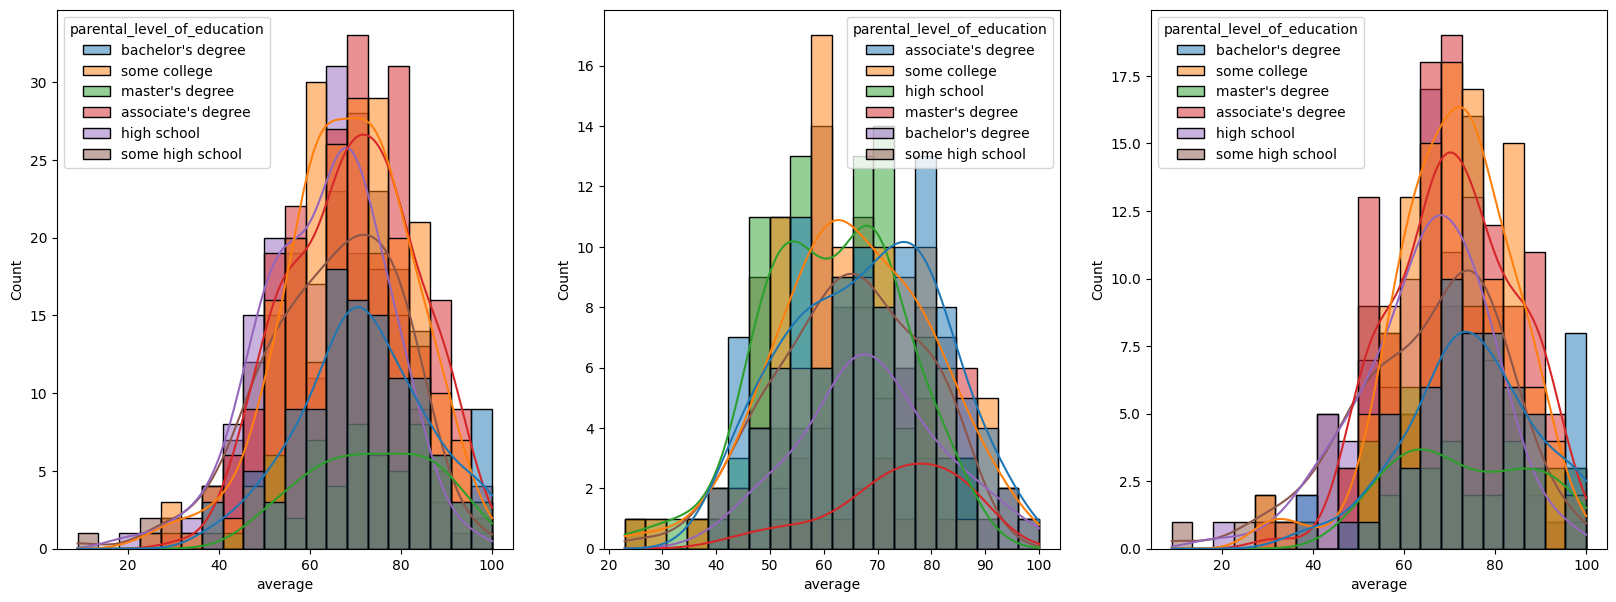

In [44]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', bins=20, kde=True, color='r', hue='parental_level_of_education')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='average', bins=20, kde=True, color='r', hue='parental_level_of_education')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='average', bins=20, kde=True, color='r', hue='parental_level_of_education')

> - *In general, parent's education don't help students perform well in the exams.*
> - *2nd plot shows that when parents have either associate's degree or master's degree , their male child tend to perform well in the exams.*
> - *3rd plot shows that there is no effect of parent's education on female students.*

### **4.3 Visualizing average score based on test preparation course**

<Axes: xlabel='average', ylabel='Count'>

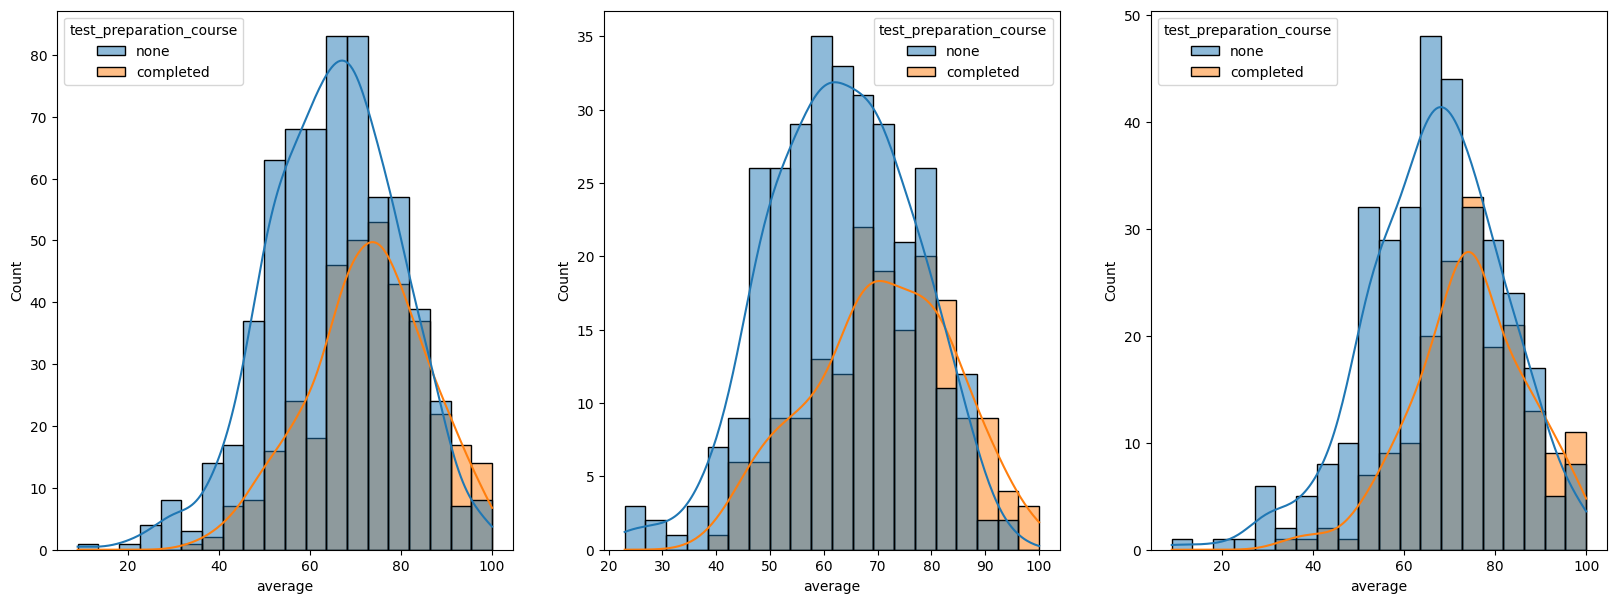

In [46]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x='average', bins=20, kde=True, color='r', hue='test_preparation_course')
plt.subplot(1, 3, 2)
sns.histplot(data=df[df['gender'] == 'male'], x='average', bins=20, kde=True, color='r', hue='test_preparation_course')
plt.subplot(1, 3, 3)
sns.histplot(data=df[df['gender'] == 'female'], x='average', bins=20, kde=True, color='r', hue='test_preparation_course')

> - *Students who completed their test preparation course are performing well in the exams.*
> - *Students who completed their test preparation course are performing well in the exams be it a male or female.*